# Modelling

In [32]:
# Import requirements 
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import confusion_matrix,accuracy_score, explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,  cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz
from xgboost import plot_importance, plot_tree

import matplotlib.pyplot as plt # we only need pyplot
import numpy as np
import pandas as pd
import seaborn as sb
import xgboost as xgb

sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('tabular_data/clean_tabular_data.csv')
dataset = df

In [3]:
features = dataset[["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"]]
labels = dataset[["Price_Night"]]
loaded_data = features,labels
newdf= dataset[["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"]]


In [4]:
newdf.info()  # confirm that the Dtypes are float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guests                829 non-null    float64
 1   beds                  829 non-null    float64
 2   bathrooms             829 non-null    float64
 3   Cleanliness_rating    829 non-null    float64
 4   Accuracy_rating       829 non-null    float64
 5   Communication_rating  829 non-null    float64
 6   Location_rating       829 non-null    float64
 7   Check-in_rating       829 non-null    float64
 8   Value_rating          829 non-null    float64
 9   amenities_count       829 non-null    float64
dtypes: float64(10)
memory usage: 64.9 KB


In [5]:
features.head() #check features array

,guests,beds,bathrooms,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count
0,2.0,1.0,1.0,4.6,4.7,4.3,5.0,4.3,4.3,13.0
1,3.0,3.0,1.0,4.3,4.7,4.6,4.9,4.7,4.5,8.0
2,4.0,2.0,1.5,4.2,4.6,4.8,4.8,4.8,4.7,51.0
3,2.0,1.0,1.0,4.8,4.9,4.9,4.9,5.0,4.6,23.0
4,4.0,3.0,1.0,5.0,4.9,5.0,4.7,5.0,4.7,32.0


In [6]:
labels.head() # Check Labels array snippet

,Price_Night
0,105.0
1,92.0
2,52.0
3,132.0
4,143.0


# For modeling of machine learning
there are 3 class of ML such as supervised , unsupervised and reinforcement learning
Next, Use the supervised learning, there are 2 type of the supervised learning 

1 Regression model such as Linear, Ridge, Lasso, Stochastic Gradient Descent (SGD).

2 Classification model such as Random Forest, XGBoost, CatBoost and K-nearest neighbours

In [7]:
# Split dataset into train and test sets
X = features
y = labels
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


# Regression models
Linear Regression model

Price - a * (Predictor Variables) + b

In [8]:
# Creating and fitting the model
linreg= LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b  = ', linreg.intercept_)

# Print the Coefficients of the Linear Regression line
linreg_coefs= pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0][:])), columns = ['Predictors','Coefficients'])
print(linreg_coefs)

# Coefficients where the value is positive means that as the predictor variable increases, the response variable will also increase.. and vice versa

Intercept of Regression 	: b  =  [153.45987459]
             Predictors  Coefficients
0                guests     27.555977
1                  beds      7.202953
2             bathrooms     47.547102
3    Cleanliness_rating     20.673668
4       Accuracy_rating     18.978132
5  Communication_rating      1.875143
6       Location_rating     19.212447
7       Check-in_rating    -11.820720
8          Value_rating    -34.146319
9       amenities_count      6.796820


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

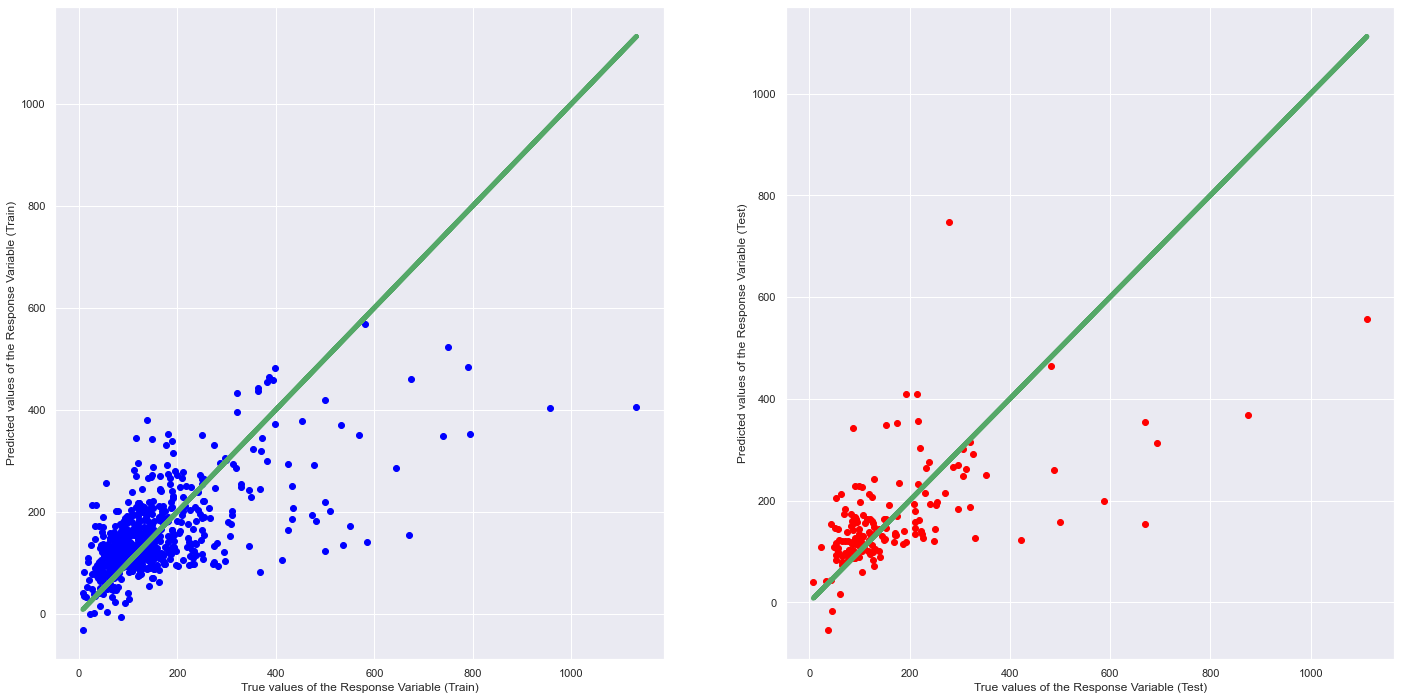

In [9]:
# Predict Response corresponding to Predictors

trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

Ride Regression model

Theoretically an upgraded version of the linear regression in that its'   purpose is to handle overfitting of data. 
Simply, it does this by penalising RSS by adding another term and search for the minimization.

In [10]:
# Numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"])

# Initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

In [11]:
# Store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})
ridgeDF

lambdas = np.arange(0,4000,1) 
for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
ridgeDF

bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])

#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

The highest R2 value:  0.4194955941092716
The value of lambda that minimises:  0


variable,1,guests,beds,bathrooms,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count
0,estimate,27.555977,7.202953,47.547102,20.673668,18.978132,1.875143,19.212447,-11.820720,-34.146319,6.796820
1,estimate0,27.555977,7.202953,47.547102,20.673668,18.978132,1.875143,19.212447,-11.820720,-34.146319,6.796820
2,estimate1,27.466035,7.343802,47.420988,20.592729,18.883915,1.833805,19.171917,-11.727678,-34.008466,6.804010
3,estimate2,27.378496,7.481604,47.295787,20.512329,18.790737,1.793337,19.131635,-11.635900,-33.871790,6.811089
4,estimate3,27.293265,7.616458,47.171494,20.432463,18.698579,1.753717,19.091599,-11.545362,-33.736276,6.818060


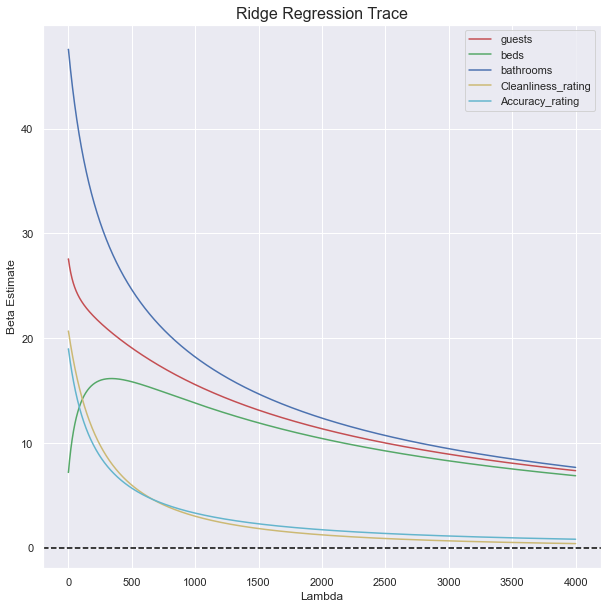

In [12]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.guests,'r',ridgeDF.beds,'g',ridgeDF.bathrooms,'b',ridgeDF.Cleanliness_rating,'y',ridgeDF.Accuracy_rating,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['guests','beds','bathrooms','Cleanliness_rating','Accuracy_rating'])

ax.grid(True)

Lasso Regression Model

In [13]:
# Initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
# Stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02) #lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


# Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

The highest R2 value:  0.419495454626463


variable,1,guests,beds,bathrooms,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count
0,estimate,27.135072,7.041560,46.867728,18.512899,15.935486,0.000000,17.794754,-7.309686,-30.795574,6.042792
1,estimate0.01,27.550739,7.202912,47.539827,20.652957,18.950654,1.837257,19.198758,-11.765518,-34.110038,6.790331
2,estimate0.03,27.540540,7.202669,47.525194,20.611469,18.895780,1.761568,19.171398,-11.655162,-34.037488,6.777330
3,estimate0.049999999999999996,27.529932,7.202673,47.510681,20.569944,18.841031,1.685918,19.144032,-11.544853,-33.965040,6.764347
4,estimate0.06999999999999999,27.519660,7.202500,47.496075,20.528510,18.786279,1.610210,19.116655,-11.434550,-33.892557,6.751341


<ipython-input-14-86e0c31d7dc1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-1, 100, 1))


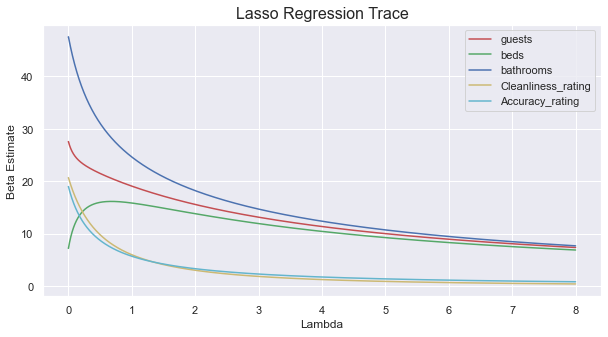

In [14]:
# Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ridgeDF.guests,'r',ridgeDF.beds,'g',ridgeDF.bathrooms,'b',ridgeDF.Cleanliness_rating,'y',ridgeDF.Accuracy_rating,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['guests','beds','bathrooms','Cleanliness_rating','Accuracy_rating'])
ax.grid(True)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

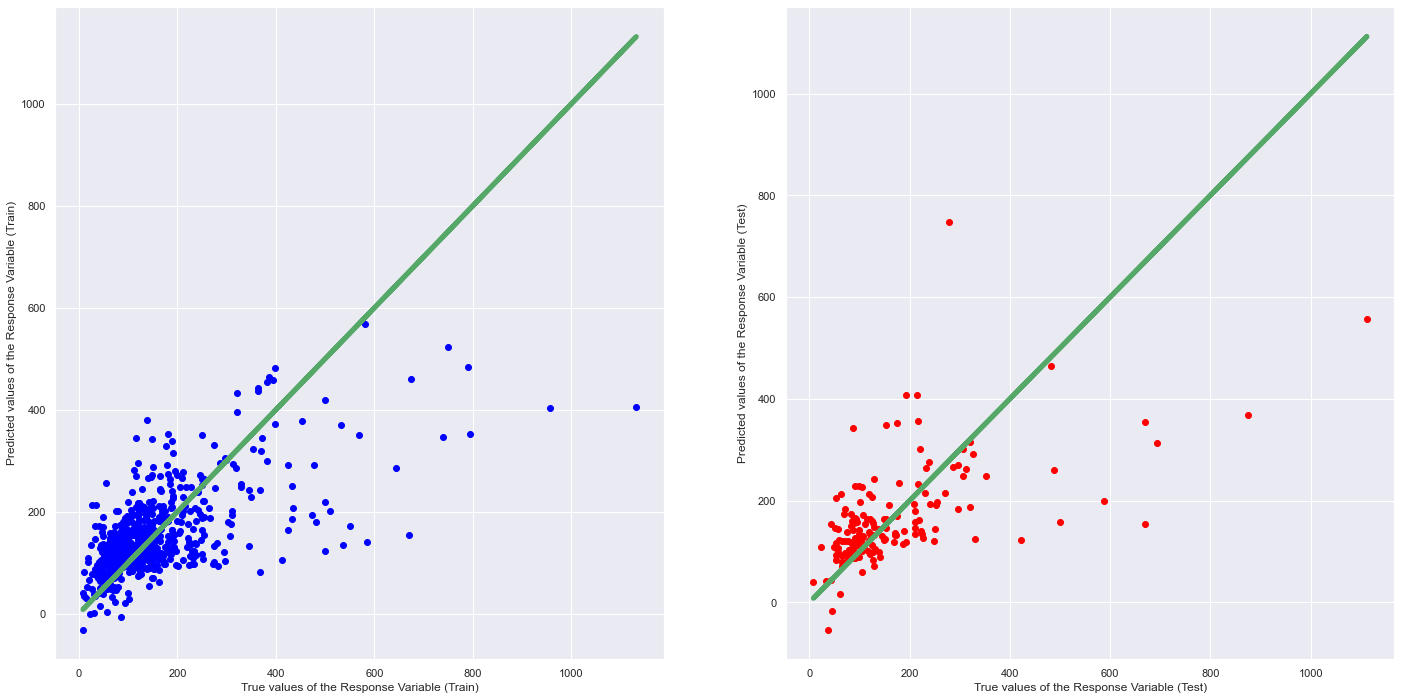

In [15]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

SGD (Stochastic Greadient Descent) model

In [16]:
# Creating and fitting the model
stochastic_gradient_descent = SGDRegressor()
stochastic_gradient_descent.fit(X_train, y_train)

# Coefficients of the SGDRegressor

print('Intercept of Regression \t: b = ', stochastic_gradient_descent.intercept_)
print()

# Print the coefficients against predictors

print(pd.DataFrame(list(zip(X_train.columns, stochastic_gradient_descent.coef_)), columns = ["Predictors", "Coefficients"]))
print()
stochastic_gradient_descent_coefs = pd.DataFrame(list(zip(X_train.columns, stochastic_gradient_descent.coef_)), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [153.13886897]

             Predictors  Coefficients
0                guests     24.608388
1                  beds      9.284051
2             bathrooms     46.849051
3    Cleanliness_rating     19.733597
4       Accuracy_rating     17.202242
5  Communication_rating     -0.306040
6       Location_rating     17.668503
7       Check-in_rating    -12.659361
8          Value_rating    -33.990750
9       amenities_count      6.343956



d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 The best parameters across ALL searched params:
 {'alpha': 0.1, 'eta0': 0.1, 'max_iter': 4000, 'tol': 0.001}


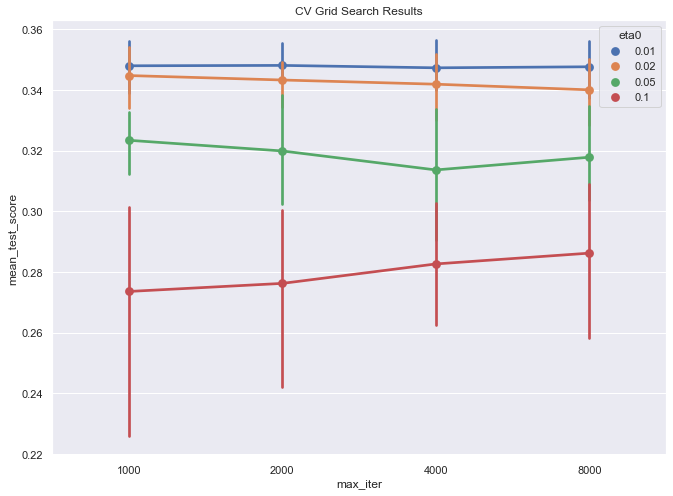

In [17]:
# Grid search Cross Validation on sgdregressor
stochastic_gradient_descent = SGDRegressor()
params = {'alpha':[0.001,0.01,0.1,1], 'eta0':[0.01,0.02,0.05,0.1],'max_iter': [1000,2000,4000,8000],'tol':[0.001,0.01,0.1,1]}
parameters  = GridSearchCV(estimator = stochastic_gradient_descent, param_grid= params, refit= True,cv = 10)
y_train = np.ravel(y_train)
parameters.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",
          parameters.best_params_)

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sb.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig
fig = plot_cv_results(parameters.cv_results_, 'max_iter', 'eta0')

# Classification models

Random forest regression model

In [18]:
# Tuning of Parameters

random_grid = {'n_estimators': [2000],
               'max_features': [2,5],
               'max_depth': [40,70],
               'min_samples_split': [40,50],
               'max_leaf_nodes':[50,70],
               'max_features': [2,5]}
               
rf_tune = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)
y_train = np.ravel(y_train)
rf_random.fit(X_train,y_train)

print(rf_random.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
RandomForestRegressor(max_depth=70, max_features=2, max_leaf_nodes=70,
                      min_samples_split=40, n_estimators=2000)


In [19]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
Accuracy_rating,0.009255
Check-in_rating,0.012061
Communication_rating,0.012658
Cleanliness_rating,0.019156
Location_rating,0.035182
Value_rating,0.048385
amenities_count,0.067637
beds,0.166017
guests,0.288390
bathrooms,0.341258


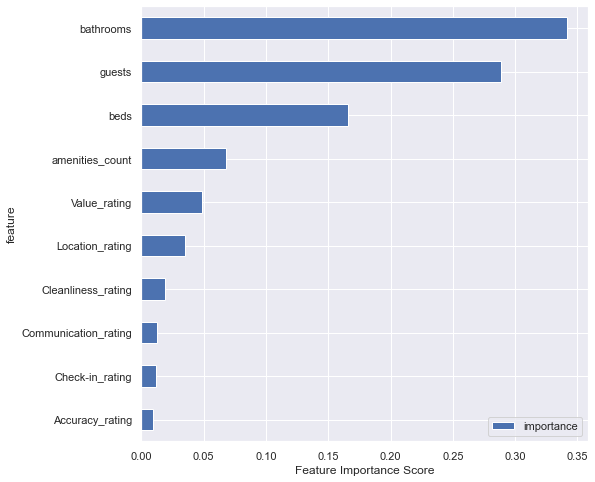

In [20]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

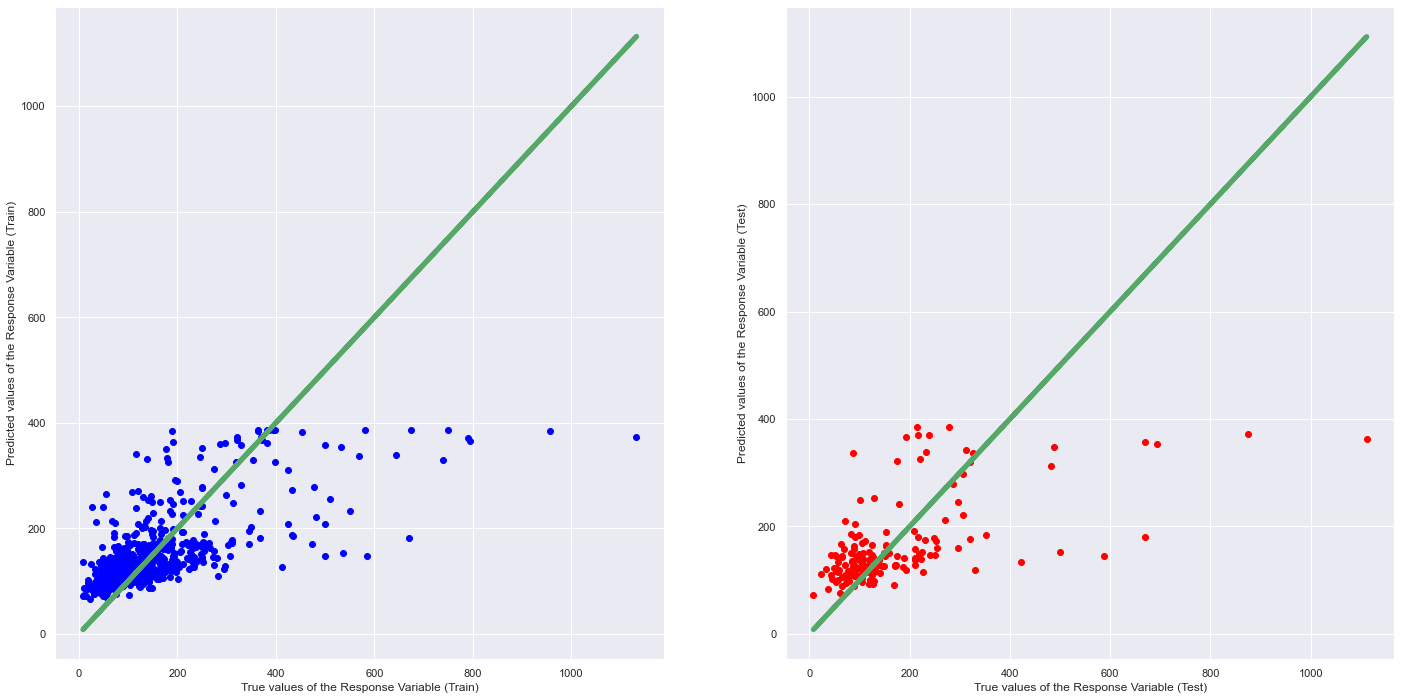

In [21]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

XGBoost

In [22]:
#Tuning the Parameters

parameters_for_testing = {
    'colsample_bytree':[0.3,0.5],
    'learning_rate':[0.1,0.5],
    'alpha': [10,12],
    'max_depth':[3,5],
    'n_estimators':[2000],  
}

                    
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,gamma=0, colsample_bytree=0.8)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)

print(gsearch1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)


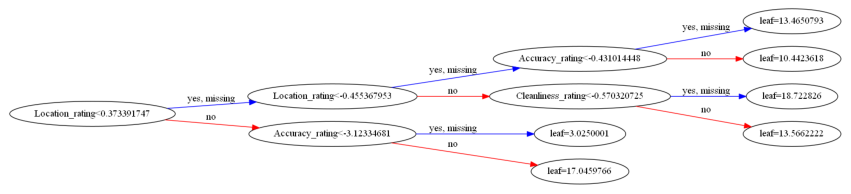

In [24]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [25]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
Check-in_rating,0.040470
Accuracy_rating,0.051511
Communication_rating,0.057431
Location_rating,0.061967
amenities_count,0.065211
Value_rating,0.070571
Cleanliness_rating,0.076331
beds,0.150488
guests,0.203849
bathrooms,0.222171


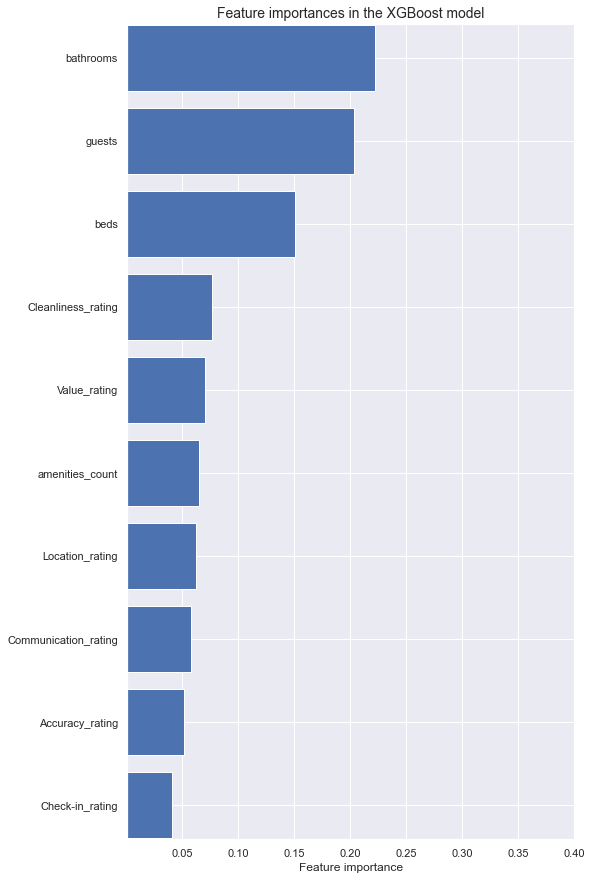

In [26]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

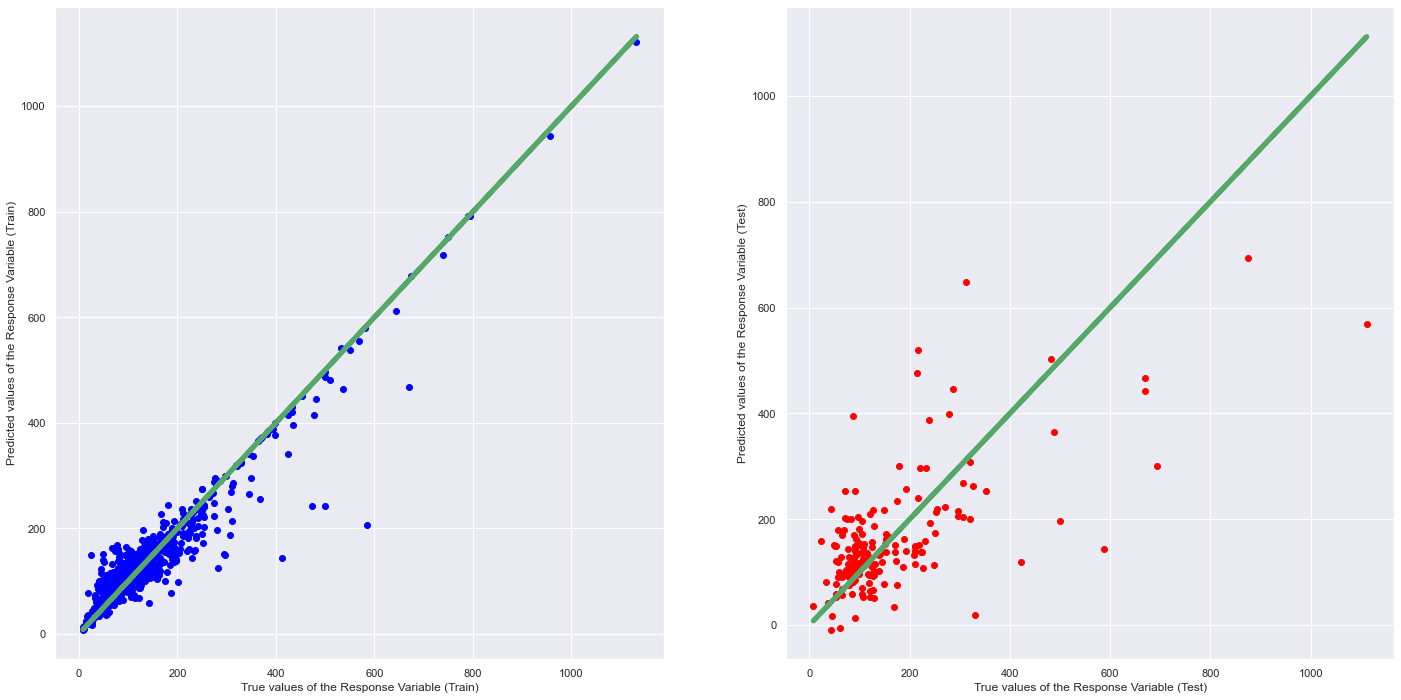

In [29]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

CatBoost 

is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems.

In [33]:
catBoost = CatBoostRegressor()

parameters = {'depth'         : [3,5],
                'learning_rate' : [0.1,0.5],
                'iterations'    : [2000]
                }
grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
y_train = np.ravel(y_train)
grid.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)

d:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.14951834         nan  0.05794745]
  warnings.warn(


0:	learn: 109.9204866	total: 143ms	remaining: 4m 46s
1:	learn: 100.3479080	total: 145ms	remaining: 2m 24s
2:	learn: 94.8396099	total: 147ms	remaining: 1m 37s
3:	learn: 90.9281728	total: 148ms	remaining: 1m 13s
4:	learn: 86.9301995	total: 149ms	remaining: 59.6s
5:	learn: 84.8107627	total: 151ms	remaining: 50.2s
6:	learn: 83.4832108	total: 153ms	remaining: 43.5s
7:	learn: 82.6992806	total: 154ms	remaining: 38.4s
8:	learn: 82.2578034	total: 156ms	remaining: 34.4s
9:	learn: 81.4184737	total: 157ms	remaining: 31.3s
10:	learn: 80.1682498	total: 160ms	remaining: 28.9s
11:	learn: 79.7887735	total: 163ms	remaining: 26.9s
12:	learn: 78.2822520	total: 164ms	remaining: 25.1s
13:	learn: 77.7961711	total: 166ms	remaining: 23.5s
14:	learn: 77.4191087	total: 168ms	remaining: 22.3s
15:	learn: 76.2758606	total: 170ms	remaining: 21.1s
16:	learn: 76.1351383	total: 172ms	remaining: 20.1s
17:	learn: 75.4110220	total: 174ms	remaining: 19.1s
18:	learn: 74.7496839	total: 175ms	remaining: 18.3s
19:	learn: 73.39

In [35]:
catBoost.get_params()
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 119.7467603	total: 593us	remaining: 1.19s
1:	learn: 116.6276387	total: 1.3ms	remaining: 1.29s
2:	learn: 113.7668270	total: 1.88ms	remaining: 1.25s
3:	learn: 111.2444812	total: 2.55ms	remaining: 1.27s
4:	learn: 109.0925394	total: 3.19ms	remaining: 1.27s
5:	learn: 107.5044445	total: 3.79ms	remaining: 1.26s
6:	learn: 105.5614784	total: 4.44ms	remaining: 1.26s
7:	learn: 104.1820625	total: 5.07ms	remaining: 1.26s
8:	learn: 103.1723362	total: 5.72ms	remaining: 1.26s
9:	learn: 102.0513528	total: 6.33ms	remaining: 1.26s
10:	learn: 100.9092423	total: 6.9ms	remaining: 1.25s
11:	learn: 100.0817223	total: 8.31ms	remaining: 1.38s
12:	learn: 99.2476078	total: 9.14ms	remaining: 1.4s
13:	learn: 98.4482914	total: 9.93ms	remaining: 1.41s
14:	learn: 97.7415537	total: 10.6ms	remaining: 1.41s
15:	learn: 97.0545265	total: 11.4ms	remaining: 1.41s
16:	learn: 96.4174877	total: 12ms	remaining: 1.4s
17:	learn: 95.7130678	total: 12.6ms	remaining: 1.38s
18:	learn: 95.2273655	total: 13.2ms	remaining: 1.38

(0.001, 20.0)

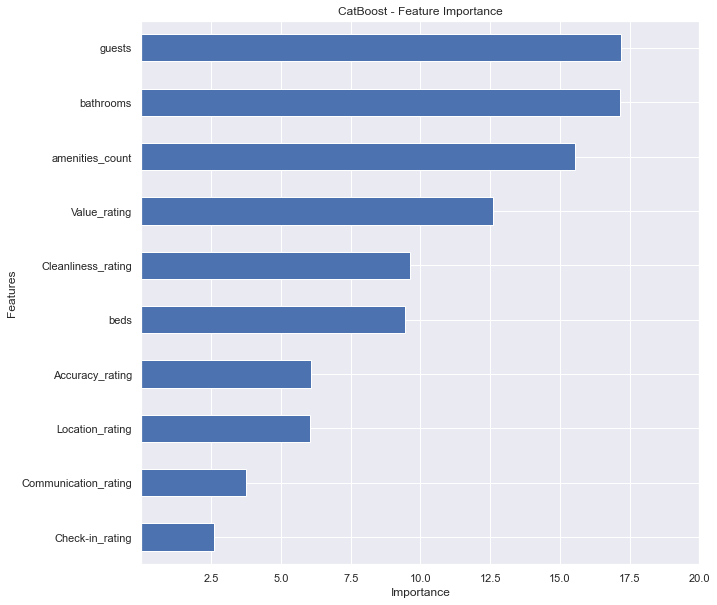

In [36]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.xlim(0.001, 20.0)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

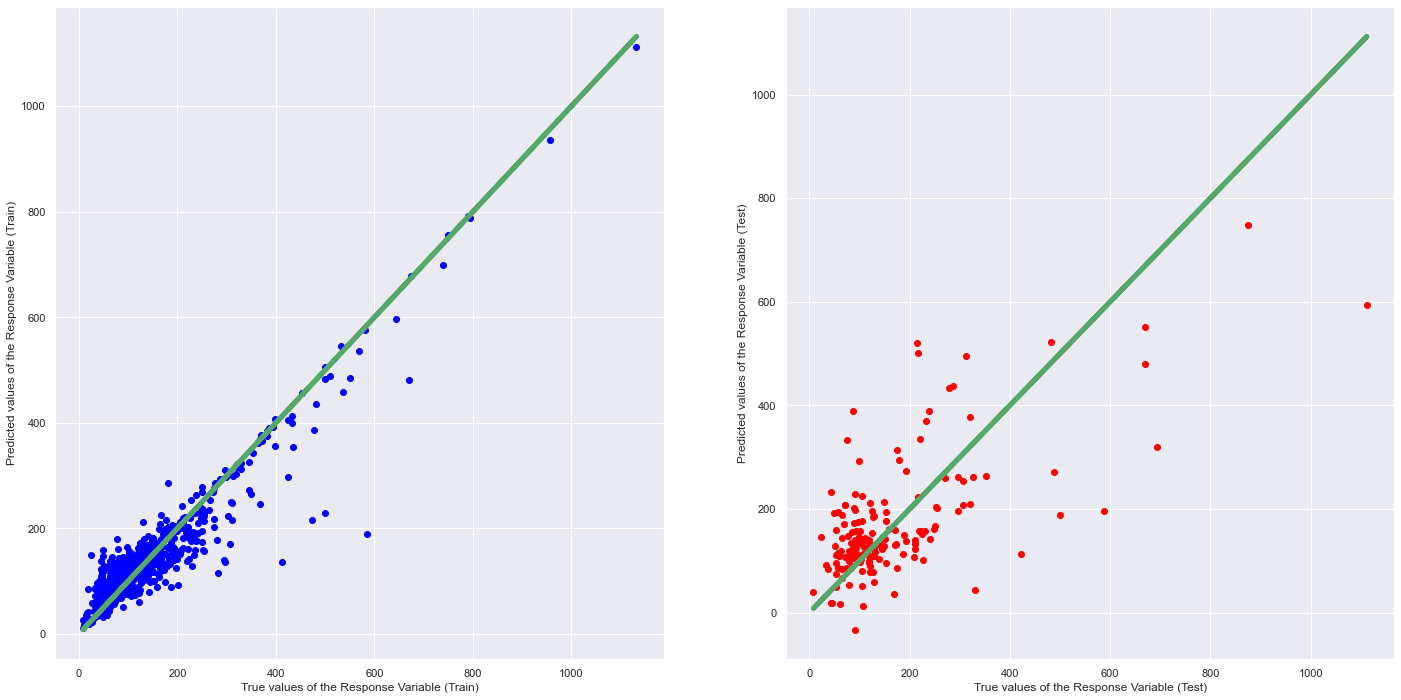

In [37]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


Evaluation model performance
    Split dataset into 80% train and 20% test

In [38]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))

print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 14964.1791
Linear Regression (R^2): 0.3422

Ridge Regression (MSE): 14964.1791
Ridge Regression (R^2): 0.3422

Lasso Regression (MSE): 14964.7896
Lasso Regression (R^2): 0.3422

Random Forest Regression (MSE): 14919.0094
Random Forest Regression (R^2): 0.3442

XGBoost (MSE): 12863.5094
XGBoost (R^2): 0.4346

CatBoost (MSE): 12545.3196
CatBoost (R^2): 0.4486


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.4195
Ridge Regression (R^2): 0.4195
Lasso Regression (R^2): 0.4195
Random Forest Regression (R^2): 0.4445
XGBoost (R^2): 0.8963
CatBoost (R^2): 0.8732


The result show that, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics.

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model

K-fold cross validation

In [39]:
kf = KFold(n_splits = 10)
y_oned = np.ravel(y)
scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_RF = cross_validate(RF,X,y_oned,cv=kf,scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_CatB = cross_validate(CatB,X,y_oned,cv=kf,scoring=scoring)

0:	learn: 126.8122771	total: 739us	remaining: 1.48s
1:	learn: 123.4540978	total: 1.45ms	remaining: 1.45s
2:	learn: 120.4987411	total: 2.17ms	remaining: 1.44s
3:	learn: 117.2417253	total: 3.08ms	remaining: 1.54s
4:	learn: 114.6057044	total: 3.92ms	remaining: 1.56s
5:	learn: 112.7202606	total: 4.81ms	remaining: 1.6s
6:	learn: 110.5982583	total: 5.77ms	remaining: 1.64s
7:	learn: 109.1032451	total: 6.55ms	remaining: 1.63s
8:	learn: 107.7259037	total: 7.3ms	remaining: 1.62s
9:	learn: 106.4542888	total: 7.99ms	remaining: 1.59s
10:	learn: 105.3642704	total: 8.7ms	remaining: 1.57s
11:	learn: 104.2303583	total: 9.43ms	remaining: 1.56s
12:	learn: 103.0093711	total: 10ms	remaining: 1.53s
13:	learn: 102.1559243	total: 10.7ms	remaining: 1.52s
14:	learn: 101.2843102	total: 11.4ms	remaining: 1.5s
15:	learn: 100.6411182	total: 11.9ms	remaining: 1.48s
16:	learn: 99.9686739	total: 12.7ms	remaining: 1.48s
17:	learn: 99.1858578	total: 13.4ms	remaining: 1.48s
18:	learn: 98.4411441	total: 14.2ms	remaining: 

In [40]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()
print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.3137
Ridge Regression R^2: 0.1075
Lasso Regression R^2: 0.2829
Random Forest R^2: 0.2896
XGBooost R^2: 0.1329
CatBoost R^2: 0.1868

Linear Regression MSE: 10566.733
Ridge Regression MSE: 13899.0729
Lasso Regression MSE: 11134.359
Random Forest MSE: 10930.0019
XGBooost MSE: 13149.1467
CatBoost MSE: 12585.0875


Custom model hyperparameters

In [41]:
def custom_tune_regression_model_hyperparameters(model_class,data,param_dict):
    # loss_function_list = ["squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"]
    for model, value in model_class.items():
        model_name = model
        number_of_test_sets = len(list(param_dict.values())[0])
        rmse_record=[]
        r2_record=[]

        for i in range(number_of_test_sets):
            settings = [list_of_values[i] for list_of_values in param_dict.values()]

            alpha_val = settings[0] 
            max_iter_val = settings[1]
            tol_val = settings[2]

            model_class_instance= value(alpha= alpha_val,max_iter=max_iter_val,tol=tol_val)
            
            X_train, X_test, y_train, y_test = data
            y_train = np.ravel(y_train)
            model_class_instance.fit(X_train,y_train)

            training_set = model_class_instance.predict(X_train)
            y_hat=model_class_instance.predict(X_test)
            y_test_flat = np.ravel(y_test)

            mse = mean_squared_error(y_test_flat, y_hat)
            rmse = mean_squared_error(y_test_flat, y_hat, squared=False)
            rmse_record.append(rmse)
            mae = mean_absolute_error(y_test_flat, y_hat)
            r2 = r2_score(y_test_flat, y_hat)
            r2_record.append(r2)
            results= {'Model Name':model_name,
                    'MSE':mse,
                    'RMSE':rmse,
                    'MAE': mae,
                    'R2':r2,
                    'Param(a,max_it,tol)': [alpha_val, max_iter_val, tol_val]} 
            print(results)
        min_rmse = min(rmse_record)
        max_r2 = max(r2_record)
        best_rmse_setting = ([index for index, item in enumerate(rmse_record) if item ==min_rmse])
        best_r2_setting = ([index for index, item in enumerate(r2_record) if item == max_r2])
        if best_rmse_setting == best_r2_setting:
            settings=[list_of_values[best_rmse_setting[0]] for list_of_values in param_dict.values()]
            alpha_val = settings[0] 
            max_iter_val = settings[1]
            tol_val = settings[2]
            print()
            print(f'The best performing hyperparameter settings for {model_name} estimator is:' + ' alpha: ' + str(alpha_val) + ' max_iter: ' + str(max_iter_val) + ' tol: ' + str(tol_val))
            print()
    pass

model_class = { 'SGDRegressor':SGDRegressor,
                #'LinearRegression':LinearRegression,
                #'RandomForestRegressor' : RandomForestRegressor,
                'LassoRegression': Lasso,
                'RidgeRegression': Ridge}

data = (X_train, X_test, y_train, y_test)

param_dict = {'alpha':[0.001,0.01,0.1,1],
              'max_iter':[1000,5000,10000,50000],
              'tol':[0.1,0.01,0.001,0.001]}

custom_tune_regression_model_hyperparameters(model_class,data,param_dict)

{'Model Name': 'SGDRegressor', 'MSE': 15003.917403553658, 'RMSE': 122.49047882816713, 'MAE': 73.44912108819287, 'R2': 0.3404839752286426, 'Param(a,max_it,tol)': [0.001, 1000, 0.1]}
{'Model Name': 'SGDRegressor', 'MSE': 15131.407593199086, 'RMSE': 123.00978657488633, 'MAE': 73.51150673356129, 'R2': 0.3348799838968598, 'Param(a,max_it,tol)': [0.01, 5000, 0.01]}
{'Model Name': 'SGDRegressor', 'MSE': 15283.182631028365, 'RMSE': 123.62516989281902, 'MAE': 73.58775980539828, 'R2': 0.32820852157696057, 'Param(a,max_it,tol)': [0.1, 10000, 0.001]}
{'Model Name': 'SGDRegressor', 'MSE': 16709.625591241365, 'RMSE': 129.2657169989064, 'MAE': 76.16238026909538, 'R2': 0.26550743056322657, 'Param(a,max_it,tol)': [1, 50000, 0.001]}

The best performing hyperparameter settings for SGDRegressor estimator is: alpha: 0.001 max_iter: 1000 tol: 0.1

{'Model Name': 'LassoRegression', 'MSE': 14964.437523571005, 'RMSE': 122.32921778369632, 'MAE': 73.38031651713379, 'R2': 0.3422193629146906, 'Param(a,max_it,tol)

In [42]:
def tune_regression_model_hyperparameters(model_class, data):
    for model, value in model_class.items():
        model_name = model
        X_train, X_test, y_train, y_test = data
        hyperparam_setting = GridSearchCV(estimator =value(), param_grid = param_dict, cv = 2, n_jobs=6)
        y_train = np.ravel(y_train)
        hyperparam_setting.fit(X_train, y_train)
        
        print(f"\n The best parameters across ALL searched params for {model_name}:\n", hyperparam_setting.best_params_)


model_class = { 'SGDRegressor':SGDRegressor,
                #'LinearRegression':LinearRegression,
                #'RandomForestRegressor' : RandomForestRegressor,
                'LassoRegression': Lasso,
                'RidgeRegression': Ridge}

data = (X_train, X_test, y_train, y_test)

param_dict = {'alpha':[0.001,0.01,0.1,1],
              'max_iter':[1000,5000,10000,50000],
              'tol':[0.1,0.01,0.001,0.001]}

tune_regression_model_hyperparameters(model_class, data)


 The best parameters across ALL searched params for SGDRegressor:
 {'alpha': 0.1, 'max_iter': 5000, 'tol': 0.001}

 The best parameters across ALL searched params for LassoRegression:
 {'alpha': 1, 'max_iter': 1000, 'tol': 0.1}

 The best parameters across ALL searched params for RidgeRegression:
 {'alpha': 1, 'max_iter': 1000, 'tol': 0.1}
